In [326]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

Data From 
Station: 000106 ON I-70 NE/O SH 9, BLUE RIVER PKWY, AT EISENHOWER TUNNEL	
Annual csv files from 2018 to 2023
https://dtdapps.coloradodot.info/otis/TrafficData#ui/1/1/0/station/000106/criteria/070A/0/449.589/false/true/


In [64]:
# install kaleido for exporting plotly images 
pip install kaleido

  Using cached kaleido-0.2.1-py2.py3-none-win_amd64.whl (65.9 MB)
Note: you may need to restart the kernel to use updated packages.


In [330]:
# import all packages needed 
import seaborn as sns
import numpy as np
import pandas as pd
import glob
import scipy.stats
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
plt.style.use('ggplot')
import os
if not os.path.exists("images"):
    os.mkdir("images")
import kaleido 
import plotly.graph_objects as go

In [3]:
# Read csvs
Eisenhower_raw = pd.concat(map(pd.read_csv, 
                            ['E_2018.csv','E_2019.csv','E_2020.csv', 'E_2021.csv','E_2022.csv','E_2023.csv']))

# Convert date to a formatted date
Eisenhower_raw['COUNTDATE'] = pd.to_datetime(Eisenhower_raw['FormattedDate'], infer_datetime_format = True)

# Set index to formatted date
Eisenhower_raw = Eisenhower_raw.set_index('COUNTDATE')

# Add weekdays and months using the formatted date 
Eisenhower_raw['Weekday'] =  Eisenhower_raw.index.dayofweek
Eisenhower_raw['Month'] = Eisenhower_raw.index.month

# Split dataframe into eastbound and westbound dataframes 
Eisenhower_West = Eisenhower_raw.loc[Eisenhower_raw.COUNTDIR != 'P', :]  
Eisenhower_East = Eisenhower_raw.loc[Eisenhower_raw.COUNTDIR == 'P', :]

In [290]:
Eisenhower_West.head()

COUNTSTATIONID COUNTDIR  HOUR0  HOUR1  HOUR2  HOUR3  HOUR4  HOUR5  \
COUNTDATE                                                                       
2018-01-01             106        S     64     95     86     78     73    113   
2018-01-02             106        S     84     92     89     91    123    257   
2018-01-03             106        S    138    114     83     83     81    219   
2018-01-04             106        S    150    134     78    114    103    227   
2018-01-05             106        S    172    100     91     91     92    223   

            HOUR6  HOUR7  ...  HOUR17  HOUR18  HOUR19  HOUR20  HOUR21  HOUR22  \
COUNTDATE                 ...                                                   
2018-01-01    304    952  ...     893     638     501     457     320     230   
2018-01-02    477    984  ...     921     715     571     463     303     300   
2018-01-03    472   1054  ...     860     684     586     478     395     284   
2018-01-04    429    963  ...     933     914     759     637     408     307   
2018-01-05    431   1007  ...    1693    1533    1473    1163     752     431   

            HOUR23  FormattedDate  Weekday  Month  
COUNTDATE                                          
2018-01-01     134       1/1/2018        0      1  
2018-01-02     221       1/2/2018        1      1  
2018-01-03     186       1/3/2018        2      1  
2018-01-04     216       1/4/2018        3      1  
2018-01-05     292       1/5/2018        4      1  

[5 rows x 29 columns]

In [92]:
# split dataframes into pre and post covid data frames 
Pre_Eisenhower_West = Eisenhower_West.loc['2019-02-01':'2019-04-30']
Pre_Eisenhower_East = Eisenhower_East.loc['2019-02-01':'2019-04-30']

Post_Eisenhower_West = Eisenhower_West.loc['2023-02-01':'2023-04-30']
Post_Eisenhower_East = Eisenhower_East.loc['2023-02-01':'2023-04-30']

During_Eisenhower_West = Eisenhower_West.loc['2020-02-01':'2020-04-30']
During_Eisenhower_East = Eisenhower_East.loc['2020-02-01':'2020-04-30']

# group them my means of the month and weekday so they have the same number of rows 
a = Pre_Eisenhower_West.groupby(['Month','Weekday']).mean()
b = Post_Eisenhower_West.groupby(['Month','Weekday']).mean()
c = During_Eisenhower_West.groupby(['Month','Weekday']).mean()

C:\Users\Natalie\AppData\Local\Temp\ipykernel_7432\1282814503.py:12: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

C:\Users\Natalie\AppData\Local\Temp\ipykernel_7432\1282814503.py:13: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

C:\Users\Natalie\AppData\Local\Temp\ipykernel_7432\1282814503.py:14: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [308]:
# make lists for weekdays, months, and hours 
days_ = list(range(7))
days_ = days_ * 72

hours_ = list(range(24))
hours_ = hours_ * 21
hours_.sort()

month_ = (list(range(2,3))* 7) + (list(range(3,4))* 7)  + (list(range(4,5))* 7)
month_ = month_ * 24

# make lists of counts of just one column for all months, weekdays, and hours 
listPre = []
column = range(1,25)
for i in column:
    list1 = list(a.iloc[:,i])
    listPre += list1

listDur = []
column = range(1,25)
for i in column:
    list2 = list(c.iloc[:,i])
    listDur += list2
    
listPost = []
column = range(1,25)
for i in column:
    list3 = list(b.iloc[:,i])
    listPost += list3
    
# create dataframes for each covid dataframe with columns month, weekday, hour, and counts 
dataPre = {'Month' : month_ , 'Weekday': days_ , 'Hour': hours_ , 'CountPre': listPre}
PreCovid = pd.DataFrame(dataPre)

dataDur = {'Month' : month_ , 'Weekday': days_ , 'Hour': hours_ , 'CountDur': listDur}
DurCovid = pd.DataFrame(dataDur)

dataPost = {'Month' : month_ , 'Weekday': days_ , 'Hour': hours_ , 'CountPost': listPost}
PostCovid = pd.DataFrame(dataPost)
PostCovid

#merge pre, during, and post covid into one dataframe 
All_Covid = pd.merge(PreCovid, DurCovid, on = ('Month', 'Weekday', 'Hour'))
All_Covid = pd.merge(All_Covid, PostCovid, on = ('Month', 'Weekday', 'Hour'))

All_Covid = All_Covid.replace({"Month": dict})
All_Covid = All_Covid.replace({"Weekday": dict2})

# make another version of the covid data so that it can all be stacked on top of itself 
dataPre2 = {'Month' : month_ , 'Weekday': days_ , 'Hour': hours_ , 'Time' : 'Pre', 'Count': listPre}
PreCovid2 = pd.DataFrame(dataPre2)

dataDur2 = {'Month' : month_ , 'Weekday': days_ , 'Hour': hours_ , 'Time' : 'During', 'Count': listDur}
DurCovid2 = pd.DataFrame(dataDur2)

dataPost2 = {'Month' : month_ , 'Weekday': days_ , 'Hour': hours_ , 'Time' : 'Post', 'Count': listPost}
PostCovid2 = pd.DataFrame(dataPost2)

Covid_stacked = pd.concat([PreCovid2, DurCovid2, PostCovid2], axis = 0)

dict = {1 : 'January', 2 : 'February', 3 : 'March', 4: 'April', 5 : 'May', 6 : 'June', 7 : 
        'July', 8 : 'August', 9 : 'September', 10 : 'October', 11 : 'November', 12 : 'December'}
dict2 = {0 : 'Monday', 1 : 'Tuesday', 2 : 'Wednesday',  3: 'Thursday', 4 : 'Friday', 5 : 'Saturday', 6 : 'Sunday'}
Covid_stacked = Covid_stacked.replace({"Month": dict})
Covid_stacked = Covid_stacked.replace({"Weekday": dict2})

AttributeError: 'range' object has no attribute 'iloc'

In [210]:
All_Covid

Month    Weekday  Hour  CountPre  CountDur  CountPost
0    February     Monday     0    128.25     99.75     111.25
1    February    Tuesday     0    115.25     96.50     115.25
2    February  Wednesday     0    130.50    127.25     124.50
3    February   Thursday     0    231.00    231.00     246.75
4    February     Friday     0    306.75    219.25     243.75
..        ...        ...   ...       ...       ...        ...
499     April  Wednesday    23    156.75     76.60     210.00
500     April   Thursday    23    276.25     65.60     245.00
501     April     Friday    23    320.00     63.25     220.75
502     April   Saturday    23    229.50     55.50     204.20
503     April     Sunday    23    208.25     55.00     192.20

[504 rows x 6 columns]

In [5]:
# split dataframes into west and east during ski season and grouped by weekday 
W_ski = Eisenhower_West.loc[(Eisenhower_West.Month ==1) | (Eisenhower_West.Month == 2) | 
                           (Eisenhower_West.Month ==12) | (Eisenhower_West.Month ==3)]

W_ski_Weekday = W_ski.groupby('Weekday').mean()

E_ski = Eisenhower_East.loc[(Eisenhower_East.Month ==1) | (Eisenhower_East.Month == 2) | 
                           (Eisenhower_East.Month ==12) | (Eisenhower_East.Month ==3)]

E_ski_Weekday = E_ski.groupby('Weekday').mean()

C:\Users\Natalie\AppData\Local\Temp\ipykernel_7432\1121973974.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  W_ski_Weekday = W_ski.groupby('Weekday').mean()
C:\Users\Natalie\AppData\Local\Temp\ipykernel_7432\1121973974.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  E_ski_Weekday = E_ski.groupby('Weekday').mean()


In [6]:
# split dataframes into west and east during summer and grouped by weekday 
W_summer = Eisenhower_West.loc[(Eisenhower_West.Month ==6) | (Eisenhower_West.Month == 7) | 
                           (Eisenhower_West.Month ==8) | (Eisenhower_West.Month ==9)]

W_summer_Weekday = W_summer.groupby('Weekday').mean()

E_summer = Eisenhower_East.loc[(Eisenhower_East.Month ==6) | (Eisenhower_East.Month == 7) | 
                           (Eisenhower_East.Month ==8) | (Eisenhower_East.Month ==9)]

E_summer_Weekday = E_summer.groupby('Weekday').mean()

C:\Users\Natalie\AppData\Local\Temp\ipykernel_7432\1694854922.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  W_summer_Weekday = W_summer.groupby('Weekday').mean()
C:\Users\Natalie\AppData\Local\Temp\ipykernel_7432\1694854922.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  E_summer_Weekday = E_summer.groupby('Weekday').mean()


In [95]:
# split dataframes into west and east during shoulder season and grouped by weekday 
W_shoulder = Eisenhower_West.loc[(Eisenhower_West.Month == 4) | (Eisenhower_West.Month == 5) | 
                           (Eisenhower_West.Month ==10) | (Eisenhower_West.Month ==11)]

W_shoulder_Weekday = W_shoulder.groupby('Weekday').mean()

E_shoulder = Eisenhower_East.loc[(Eisenhower_East.Month ==4) | (Eisenhower_East.Month == 5) | 
                           (Eisenhower_East.Month ==10) | (Eisenhower_East.Month ==11)]

E_shoulder_Weekday = E_shoulder.groupby('Weekday').mean()

C:\Users\Natalie\AppData\Local\Temp\ipykernel_7432\1090039887.py:5: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

C:\Users\Natalie\AppData\Local\Temp\ipykernel_7432\1090039887.py:10: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [222]:
# Make a list of weekdays 0 to 7 that repeats 24 times (0, 1, 2, 3, 4, 5, 6, 0, 1, ...)
days = list(range(7))
days = days * 24
len(days)

# Make a list of hours 0 to 23 that repeats 7 times and is sorted (0, 0, 0, 0, 0, 0, 0, 1, 1, ...)
hours = list(range(24))
hours = hours * 7
hours.sort()
hours

# pull each hour column and stack them to make a list of traffic counts 
# for ski season (winter)
listWW = []
column = range(1,25)
for i in column:
    lista = list(W_ski_Weekday.iloc[:,i])
    listWW += lista
listWW

listWE = []
column = range(1,25)
for i in column:
    listb = list(E_ski_Weekday.iloc[:,i])
    listWE += listb
listWE

# for summmer
listSW = []
column = range(1,25)
for i in column:
    listc = list(W_summer_Weekday.iloc[:,i])
    listSW += listc
listSW

listSE = []
column = range(1,25)
for i in column:
    listd = list(E_summer_Weekday.iloc[:,i])
    listSE += listd
listSE

# for shoulder season (spring/fall)
listShW = []
column = range(1,25)
for i in column:
    liste = list(W_shoulder_Weekday.iloc[:,i])
    listShW += liste
len(listShW)

listShE = []
column = range(1,25)
for i in column:
    listf = list(E_shoulder_Weekday.iloc[:,i])
    listShE += listf


# create dataframes using the days, hours, and list of counts 
# winter
dataWW = {'Weekday': days, 'Hour': hours, 'Count': listWW}
W_ski_weekday = pd.DataFrame(dataWW)
W_ski_weekday = W_ski_weekday.replace({"Weekday": dict2})

dataWE = {'Weekday': days, 'Hour': hours, 'Count': listWE}
E_ski_weekday= pd.DataFrame(dataWE)
E_ski_weekday = E_ski_weekday.replace({"Weekday": dict2})

# summer
dataSW = {'Weekday': days, 'Hour': hours, 'Count': listSW}
W_summer_weekday = pd.DataFrame(dataSW)
W_summer_weekday = W_summer_weekday.replace({"Weekday": dict2})

dataSE = {'Weekday': days, 'Hour': hours, 'Count': listSE}
E_summer_weekday= pd.DataFrame(dataSE)
E_summer_weekday = E_summer_weekday.replace({"Weekday": dict2})

# spring/fall
dataShW = {'Weekday': days, 'Hour': hours, 'Count': listShW}
W_shoulder_weekday = pd.DataFrame(dataShW)
W_shoulder_weekday = W_shoulder_weekday.replace({"Weekday": dict2})

dataShE = {'Weekday': days, 'Hour': hours, 'Count': listShE}
E_shoulder_weekday= pd.DataFrame(dataShE)
E_shoulder_weekday = E_shoulder_weekday.replace({"Weekday": dict2})

In [ ]:
E_W_Ski = pd.merge(EastSki, WestSki, on = ('Hour','Weekday'))
E_W_Summer = pd.merge(EastSummer, WestSummer, on = ('Hour','Weekday'))
E_W_Shoulder = pd.merge(EastShoulder, WestShoulder, on = ('Hour','Weekday'))
E_W_Ski.loc[E_W_Ski.Weekday == 4, ].plot.bar(x = 'Hour', y = ['Count_ESki' , 'Count_WSki'])

In [225]:
# rename count column in each data frame
EastSki = E_ski_weekday.rename(columns={"Count": "Count_ESki"})
WestSki = W_ski_weekday.rename(columns={"Count": "Count_WSki"})
WestSummer = W_summer_weekday.rename(columns={"Count": "Count_WSummer"})
EastSummer = E_summer_weekday.rename(columns={"Count": "Count_ESummer"})
WestShoulder = W_shoulder_weekday.rename(columns={"Count": "Count_WShoulder"})
EastShoulder = E_shoulder_weekday.rename(columns={"Count": "Count_EShoulder"})

# merge data frame into one dataframe that includes counts for each season east and west 
All_Seasons = pd.merge(EastSki, WestSki, on = ('Hour','Weekday'))
All_Seasons = pd.merge(All_Seasons, EastSummer, on = ('Hour','Weekday'))
All_Seasons = pd.merge(All_Seasons, WestSummer, on = ('Hour','Weekday'))
All_Seasons = pd.merge(All_Seasons, EastShoulder, on = ('Hour','Weekday'))
All_Seasons = pd.merge(All_Seasons, WestShoulder, on = ('Hour','Weekday'))

In [362]:
All_Seasons

Weekday  Hour  Count_ESki  Count_WSki  Count_ESummer  Count_WSummer  \
0       Monday     0   98.393617  112.861702     141.000000     157.190000   
1      Tuesday     0   73.829787  112.648936     106.610000     146.740000   
2    Wednesday     0   83.821053  122.231579     108.792079     152.405941   
3     Thursday     0   82.263736  168.307692     119.163462     174.750000   
4       Friday     0   86.645833  221.656250     125.184466     190.902913   
..         ...   ...         ...         ...            ...            ...   
163  Wednesday    23  113.705263  225.778947     170.831683     221.831683   
164   Thursday    23  126.329670  303.604396     185.528846     253.211538   
165     Friday    23  145.250000  391.322917     208.776699     293.417476   
166   Saturday    23  158.212121  195.101010     254.596154     244.259615   
167     Sunday    23  146.956989  155.118280     227.471154     214.663462   

     Count_EShoulder  Count_WShoulder  
0          97.864583       120.229167  
1          87.250000       119.760870  
2          85.861702       121.553191  
3          84.626374       142.241758  
4          84.872340       148.606383  
..               ...              ...  
163       127.265957       171.542553  
164       127.439560       199.142857  
165       138.446809       223.489362  
166       148.468750       185.010417  
167       146.854167       159.114583  

[168 rows x 8 columns]

In [310]:
# create a dataframe that show all points East and West for time 0, 6, 10, 16, 20
list0_ = list(Eisenhower_West['HOUR0'])
list6_ = list(Eisenhower_West['HOUR6'])
list10_ = list(Eisenhower_West['HOUR10'])
list16_ = list(Eisenhower_West['HOUR16'])
list20_ = list(Eisenhower_West['HOUR20'])
listdate = list(Eisenhower_West['FormattedDate'])
listweekday = list(Eisenhower_West['Weekday'])
listdate_ = listdate * 5
hours_ = list0_ + list6_ + list10_ + list16_ + list20_
list0_E = list(Eisenhower_East['HOUR0'])
list6_E = list(Eisenhower_East['HOUR6'])
list10_E = list(Eisenhower_East['HOUR10'])
list16_E = list(Eisenhower_East['HOUR16'])
list20_E = list(Eisenhower_East['HOUR20'])
hours_E = list0_E + list6_E + list10_E + list16_E + list20_E
weekday = listweekday * 5
time_ = [0, 6, 10, 16, 20]
time = time_ * 2037
time.sort()
timeseries = {'Date' : listdate_, 'Time' : time, 'Count_W' : hours_ , 'Count_E' : hours_E , 'Weekday' : weekday}
Timeseries = pd.DataFrame(timeseries)
Timeseries['COUNTDATE'] = pd.to_datetime(Timeseries['Date'], infer_datetime_format = True)
Timeseries = Timeseries.sort_values(['COUNTDATE', 'Time'])
Timeseries = Timeseries.set_index('COUNTDATE')
Timeseries['Month'] = Timeseries.index.month
Timeseries['Year'] = Timeseries.index.year

In [311]:
# Make a dataframe that consist of the mean hourly count of cars for each month of each year 
Group_Time = Timeseries.groupby(['Year', 'Month']).agg('mean')

C:\Users\Natalie\AppData\Local\Temp\ipykernel_7432\154968364.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [312]:
#remname all months and days to appropriate names 
dict = {1 : 'January', 2 : 'February', 3 : 'March', 4: 'April', 5 : 'May', 6 : 'June', 7 : 
        'July', 8 : 'August', 9 : 'September', 10 : 'October', 11 : 'November', 12 : 'December'}
dict2 = {0 : 'Monday', 1 : 'Tuesday', 2 : 'Wednesday',  3: 'Thursday', 4 : 'Friday', 5 : 'Saturday', 6 : 'Sunday'}
Timeseries = Timeseries.replace({"Month": dict})
Timeseries = Timeseries.replace({"Weekday": dict2})

Text(0.5, 0, 'Time')

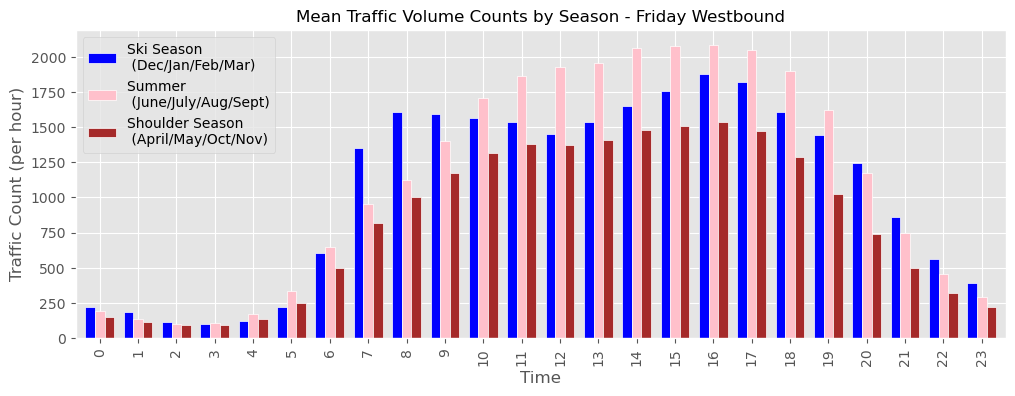

In [440]:
#& ((All_Seasons.Hour > 4) & (All_Seasons.Hour < 20))
All_Seasons.loc[(All_Seasons.Weekday == 'Friday'), ].plot.bar(
    x = 'Hour', y = ['Count_WSki', 'Count_WSummer', 'Count_WShoulder'], 
    label = ['Ski Season \n (Dec/Jan/Feb/Mar)', 'Summer \n (June/July/Aug/Sept)', 'Shoulder Season \n (April/May/Oct/Nov)'],  
    color = ['blue','pink', 'brown'], 
    figsize = (12, 4), 
    width = .75, 
    edgecolor='white')
plt.title('Mean Traffic Volume Counts by Season - Friday Westbound', fontsize = 12)
plt.ylabel('Count')
plt.legend()
plt.ylabel('Traffic Count (per hour)')
plt.xlabel('Time')

Text(0.5, 0, 'Time')

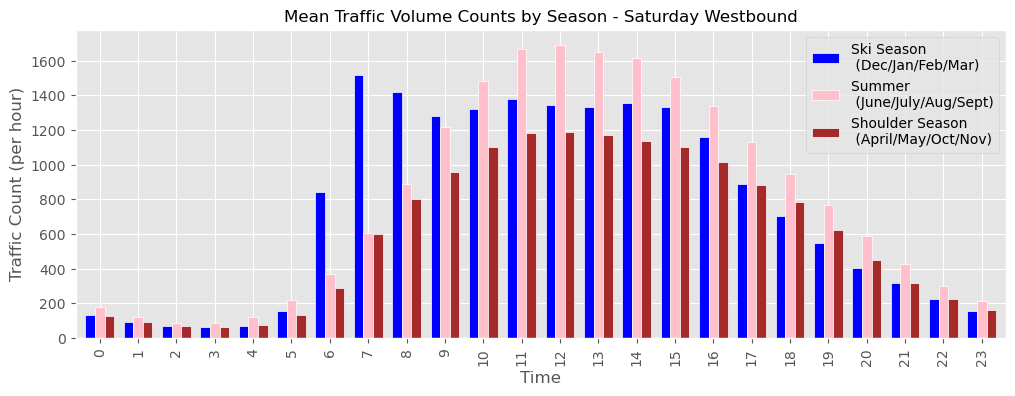

In [439]:
#All_Seasons.loc[(All_Seasons.Weekday == 'Sunday') & (All_Seasons.Hour < 12), ].plot.bar(
All_Seasons.loc[(All_Seasons.Weekday == 'Sunday'), ].plot.bar(
    x = 'Hour', y = ['Count_WSki', 'Count_WSummer', 'Count_WShoulder'], 
    label = ['Ski Season \n (Dec/Jan/Feb/Mar)', 'Summer \n (June/July/Aug/Sept)', 'Shoulder Season \n (April/May/Oct/Nov)'],  
    color = ['blue','pink', 'brown'], 
    figsize = (12, 4), 
    width = .75, 
    edgecolor='white')
plt.title('Mean Traffic Volume Counts by Season - Saturday Westbound', fontsize = 12)
plt.ylabel('Count')
plt.legend()
plt.ylabel('Traffic Count (per hour)')
plt.xlabel('Time')

In [185]:
All_Seasons

Weekday  Hour  Count_ESki  Count_WSki  Count_ESummer  Count_WSummer  \
0          0     0   98.393617  112.861702     141.000000     157.190000   
1          1     0   73.829787  112.648936     106.610000     146.740000   
2          2     0   83.821053  122.231579     108.792079     152.405941   
3          3     0   82.263736  168.307692     119.163462     174.750000   
4          4     0   86.645833  221.656250     125.184466     190.902913   
..       ...   ...         ...         ...            ...            ...   
163        2    23  113.705263  225.778947     170.831683     221.831683   
164        3    23  126.329670  303.604396     185.528846     253.211538   
165        4    23  145.250000  391.322917     208.776699     293.417476   
166        5    23  158.212121  195.101010     254.596154     244.259615   
167        6    23  146.956989  155.118280     227.471154     214.663462   

     Count_EShoulder  Count_WShoulder  
0          97.864583       120.229167  
1          87.250000       119.760870  
2          85.861702       121.553191  
3          84.626374       142.241758  
4          84.872340       148.606383  
..               ...              ...  
163       127.265957       171.542553  
164       127.439560       199.142857  
165       138.446809       223.489362  
166       148.468750       185.010417  
167       146.854167       159.114583  

[168 rows x 8 columns]

Text(0.5, 0, '24 hour clock (hours)')

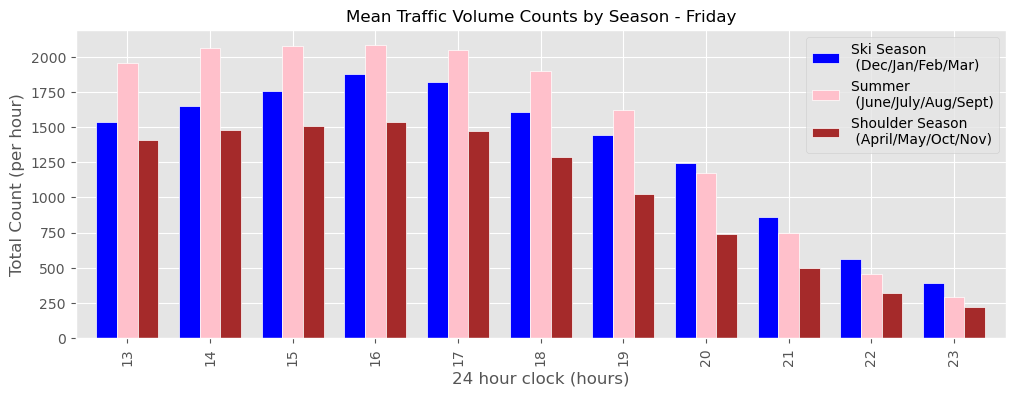

In [230]:
All_Seasons.loc[(All_Seasons.Weekday == 'Friday') & (All_Seasons.Hour > 12), ].plot.bar(
     x = 'Hour', y = ['Count_WSki', 'Count_WSummer', 'Count_WShoulder'], 
    label = ['Ski Season \n (Dec/Jan/Feb/Mar)', 'Summer \n (June/July/Aug/Sept)', 'Shoulder Season \n (April/May/Oct/Nov)'],  
    color = ['blue','pink', 'brown'], 
    figsize = (12, 4), 
    width = .75, 
    edgecolor='white')
plt.title('Mean Traffic Volume Counts by Season - Friday', fontsize = 12)
plt.ylabel('Count')
plt.legend()
plt.ylabel('Total Count (per hour)')
plt.xlabel('24 hour clock (hours)')

Text(0.5, 0, 'Time')

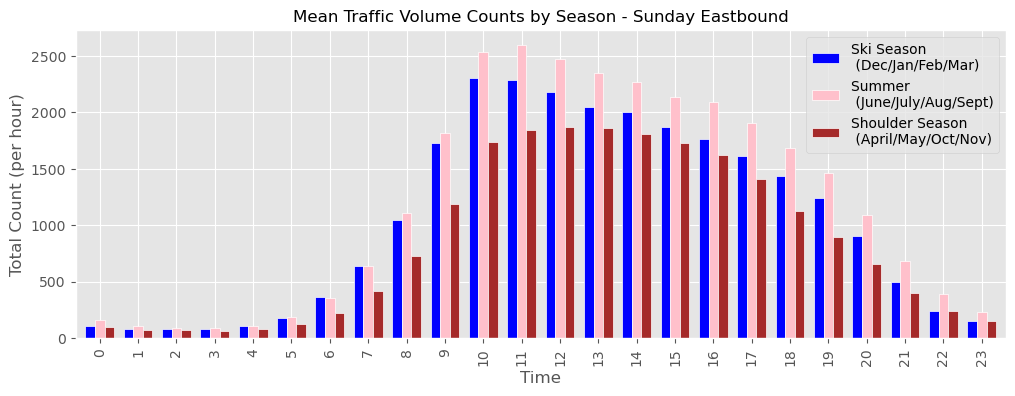

In [441]:
# not nearly as much Sunday am traffic during shoulder season (April, May, October, November)
All_Seasons.loc[(All_Seasons.Weekday == 'Sunday'), ].plot.bar(
      x = 'Hour', y = ['Count_ESki', 'Count_ESummer', 'Count_EShoulder'], 
    label = ['Ski Season \n (Dec/Jan/Feb/Mar)', 'Summer \n (June/July/Aug/Sept)', 'Shoulder Season \n (April/May/Oct/Nov)'],  
    color = ['blue','pink', 'brown'], 
    figsize = (12, 4), 
    width = .75, 
    edgecolor='white')
plt.title('Mean Traffic Volume Counts by Season - Sunday Eastbound', fontsize = 12)
plt.ylabel('Count')
plt.legend()
plt.ylabel('Total Count (per hour)')
plt.xlabel('Time')

Text(0.5, 0, 'Time')

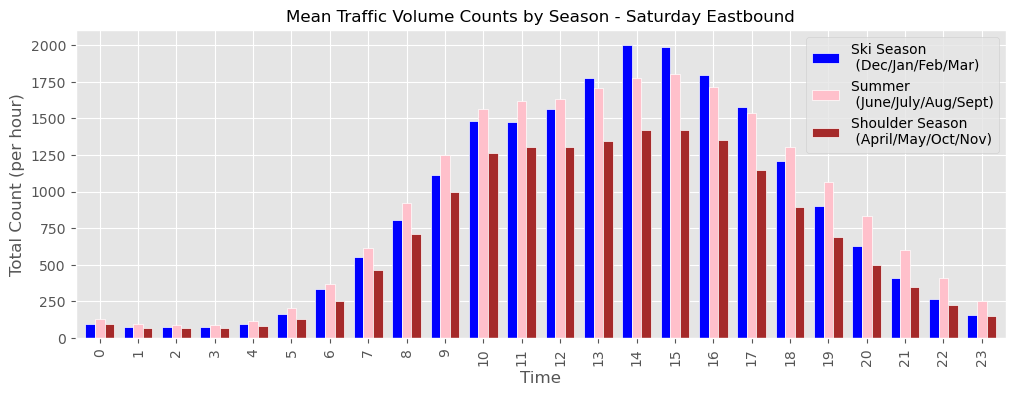

In [442]:
All_Seasons.loc[(All_Seasons.Weekday == 'Saturday'), ].plot.bar(
     x = 'Hour', y = ['Count_ESki', 'Count_ESummer', 'Count_EShoulder'], 
    label = ['Ski Season \n (Dec/Jan/Feb/Mar)', 'Summer \n (June/July/Aug/Sept)', 'Shoulder Season \n (April/May/Oct/Nov)'],  
    color = ['blue','pink', 'brown'], 
    figsize = (12, 4), 
    width = .75, 
    edgecolor='white')
plt.title('Mean Traffic Volume Counts by Season - Saturday Eastbound', fontsize = 12)
plt.ylabel('Count')
plt.legend()
plt.ylabel('Total Count (per hour)')
plt.xlabel('Time')

In [445]:
Westbound_Winter= px.scatter(W_ski_weekday, x="Hour", y="Count", color="Weekday",
           hover_name="Weekday", title = 'Westbound Hourly Mean Traffic Count by Weekday During Ski Season')

Westbound_Winter.update_yaxes(title = 'Traffic Count')
Westbound_Winter.update_xaxes(title = 'Time')

Westbound_Winter.show()
Westbound_Winter.write_image("images/Westbound_Winter.png")

In [446]:
Westbound_Summer= px.scatter(W_summer_weekday, x="Hour", y="Count", color="Weekday",
           hover_name="Weekday", title = 'Westbound Hourly Mean Traffic Count by Weekday During the Summer')

Westbound_Summer.update_yaxes(title = 'Traffic Count')
Westbound_Summer.update_xaxes(title = 'Time')
Westbound_Summer.write_image("images/Westbound_Summer.png")
Westbound_Summer.show()

In [443]:
Westbound_Shoulder= px.scatter(W_shoulder_weekday, x="Hour", y="Count", color="Weekday",
           hover_name="Weekday", range_y = (0,2000), title = 'Westbound Hourly Mean Traffic Count by Weekday During Shoulder Season')
Westbound_Shoulder.update_yaxes(title = 'Traffic Count')
Westbound_Shoulder.update_xaxes(title = 'Time')
Westbound_Shoulder.show()

In [449]:
Eastbound_Winter = px.scatter(E_ski_weekday, x="Hour", y="Count", color="Weekday",
           hover_name="Weekday", title = 'Eastbound Hourly Mean Traffic Count by Weekday During Ski Season')


Eastbound_Winter.update_yaxes(title = 'Traffic Count')
Eastbound_Winter.update_xaxes(title = 'Time')
Eastbound_Winter.show()
#Eastbound_Winter.write_image("images/Eastbound_Winter_byWeekday.png")

In [452]:
# I think high traffic Sunday am due to travel to airport??? Many 5 - 8 pm flights 
Eastbound_Summer= px.scatter(E_summer_weekday, x="Hour", y="Count", color="Weekday",
           hover_name="Weekday", title = 'Eastbound Hourly Mean Traffic Count by Weekday During the Summer')

Eastbound_Summer.update_yaxes(title = 'Traffic Count')
Eastbound_Summer.update_xaxes(title = 'Time')
Eastbound_Summer.show()
#Eastbound_Winter.write_image("images/Eastbound_Winter_byWeekday.png")

In [451]:
Eastbound_Shoulder= px.scatter(E_shoulder_weekday, x="Hour", y="Count", color="Weekday",
           hover_name="Weekday", title = 'Eastbound Hourly Mean Traffic Count by Weekday During the Shoulder Season')

Eastbound_Shoulder.update_yaxes(title = 'Traffic Count')
Eastbound_Shoulder.update_xaxes(title = 'Time')
Eastbound_Shoulder.show()

In [109]:
# not significant dif. pre and post covid westbound in Feb to April 
scipy.stats.f_oneway(All_Covid.CountPre, All_Covid.CountPost, axis = 0)

F_onewayResult(statistic=0.7293181471974739, pvalue=0.39330759886861344)

In [110]:
# very significant difference during covid 
scipy.stats.f_oneway(All_Covid.CountPre, All_Covid.CountDur, All_Covid.CountPost, axis = 0)

F_onewayResult(statistic=47.25413862684758, pvalue=1.2439600150139229e-20)

In [428]:
scipy.stats.ttest_ind(All_Covid.CountDur, All_Covid.CountPre)

Ttest_indResult(statistic=-8.351350247645245, pvalue=2.2161648071504545e-16)

In [420]:
Covid_stacked.head(50)

Month    Weekday  Hour Time       Count
0   February     Monday     0  Pre  128.250000
1   February    Tuesday     0  Pre  115.250000
2   February  Wednesday     0  Pre  130.500000
3   February   Thursday     0  Pre  231.000000
4   February     Friday     0  Pre  306.750000
5   February   Saturday     0  Pre  316.250000
6   February     Sunday     0  Pre  140.500000
7      March     Monday     0  Pre  122.000000
8      March    Tuesday     0  Pre  135.000000
9      March  Wednesday     0  Pre  150.333333
10     March   Thursday     0  Pre  145.000000
11     March     Friday     0  Pre  277.800000
12     March   Saturday     0  Pre  291.000000
13     March     Sunday     0  Pre  159.250000
14     April     Monday     0  Pre  118.600000
15     April    Tuesday     0  Pre  144.600000
16     April  Wednesday     0  Pre  125.000000
17     April   Thursday     0  Pre  160.250000
18     April     Friday     0  Pre  198.000000
19     April   Saturday     0  Pre  211.500000
20     April     Sunday     0  Pre  170.500000
21  February     Monday     1  Pre   97.000000
22  February    Tuesday     1  Pre   96.750000
23  February  Wednesday     1  Pre  107.500000
24  February   Thursday     1  Pre  185.750000
25  February     Friday     1  Pre  248.250000
26  February   Saturday     1  Pre  230.250000
27  February     Sunday     1  Pre   94.000000
28     March     Monday     1  Pre   98.666667
29     March    Tuesday     1  Pre  128.500000
30     March  Wednesday     1  Pre  117.000000
31     March   Thursday     1  Pre   92.500000
32     March     Friday     1  Pre  222.600000
33     March   Saturday     1  Pre  206.400000
34     March     Sunday     1  Pre  110.750000
35     April     Monday     1  Pre   91.200000
36     April    Tuesday     1  Pre  109.800000
37     April  Wednesday     1  Pre  103.000000
38     April   Thursday     1  Pre  113.750000
39     April     Friday     1  Pre  156.750000
40     April   Saturday     1  Pre  132.750000
41     April     Sunday     1  Pre  113.000000
42  February     Monday     2  Pre   72.250000
43  February    Tuesday     2  Pre   70.250000
44  February  Wednesday     2  Pre   70.000000
45  February   Thursday     2  Pre   86.750000
46  February     Friday     2  Pre  137.000000
47  February   Saturday     2  Pre  135.750000
48  February     Sunday     2  Pre   67.250000
49     March     Monday     2  Pre   76.333333

In [384]:
fig = px.violin(Covid_stacked, y = 'Count', x= "Time", 
                box=True, 
                points="suspectedoutliers",  
                width = 1000, 
                title = 'Distribution of Mean Hourly Traffic grouped by Month and Weeekday')
fig.update_traces(fillcolor = 'green',
                  line_color = 'blue',
                  marker_line_outliercolor= 'black',
                  box_fillcolor = 'red',
                  opacity = 0.5)
fig.add_trace(go.Scatter(
    x=['Pre', 'During', 'Post'],
    y=[706.4, 354.75, 724.5],
    mode="markers+text",
    name="Markers and Text",
    text=["Median = \n 706.4", "Median = \n 354.75", "Median = \n 724.5"],
    textposition="bottom right"
))

fig.update_yaxes(title = 'Mean Traffic Count (per hour)')
fig.update_xaxes(title = 'Time Period Relative to Covid-19 Pandemic')

fig.show()

In [423]:
All

In [427]:
Covid_Correlation = px.scatter_matrix(All_Covid, dimensions=['CountPre', 'CountDur', 'CountPost'], 
                                      color="Month", 
                                      color_discrete_sequence = ['blue', 'cyan', 'purple'], 
                                      title = 'Relationship among Pre, During, and Post-Pandemic Mean Hourly Traffic Counts')
Covid_Correlation.show()

C:\Users\Natalie\anaconda3\Lib\site-packages\plotly\express\_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



In [421]:
fig = px.bar(Covid_stacked, x= "Hour", y= "Count", color= "Month", 
             barmode="relative", facet_row="Time", facet_col="Weekday", 
             labels ={"Weekday": "Day"},
             color_discrete_sequence = ['blue', 'cyan', 'purple'],
             title = 'Weekly and Monthly Variation in Traffic Pre, During, and Post-Pandemic ')
fig.show()

In [247]:
All_Seasons

Weekday  Hour  Count_ESki  Count_WSki  Count_ESummer  Count_WSummer  \
0       Monday     0   98.393617  112.861702     141.000000     157.190000   
1      Tuesday     0   73.829787  112.648936     106.610000     146.740000   
2    Wednesday     0   83.821053  122.231579     108.792079     152.405941   
3     Thursday     0   82.263736  168.307692     119.163462     174.750000   
4       Friday     0   86.645833  221.656250     125.184466     190.902913   
..         ...   ...         ...         ...            ...            ...   
163  Wednesday    23  113.705263  225.778947     170.831683     221.831683   
164   Thursday    23  126.329670  303.604396     185.528846     253.211538   
165     Friday    23  145.250000  391.322917     208.776699     293.417476   
166   Saturday    23  158.212121  195.101010     254.596154     244.259615   
167     Sunday    23  146.956989  155.118280     227.471154     214.663462   

     Count_EShoulder  Count_WShoulder  
0          97.864583       120.229167  
1          87.250000       119.760870  
2          85.861702       121.553191  
3          84.626374       142.241758  
4          84.872340       148.606383  
..               ...              ...  
163       127.265957       171.542553  
164       127.439560       199.142857  
165       138.446809       223.489362  
166       148.468750       185.010417  
167       146.854167       159.114583  

[168 rows x 8 columns]

In [243]:
EW_weekdays = Eisenhower_West.replace ({'Weekday': dict2})
EE_weekdays = Eisenhower_East.replace ({'Weekday': dict2})

In [462]:
fig = px.violin(EW_weekdays, y = 'HOUR6', x= "Weekday", 
                box=True, 
                points="suspectedoutliers", 
                hover_data= Eisenhower_West.columns, 
                width = 1000, 
                title = 'Distribution of all Westbound Traffic at 6 am')
fig.update_traces(fillcolor = 'green',
                  line_color = 'blue',
                  marker_line_outliercolor= 'black',
                  box_fillcolor = 'red',
                  opacity = 0.5)
fig.update_yaxes(title = 'Traffic Count')
fig.show()

In [460]:
fig = px.violin(EE_weekdays, y = 'HOUR10', x= "Weekday", 
                box=True, 
                points="suspectedoutliers", 
                hover_data= Eisenhower_West.columns, 
                width = 1000, 
                title = 'Distribution of all Eastbound Traffic at 10 am')
fig.update_traces(fillcolor = 'green',
                  line_color = 'blue',
                  marker_line_outliercolor= 'black',
                  box_fillcolor = 'red',
                  opacity = 0.5)
fig.update_yaxes(title = 'Traffic Count')

fig.show()

Text(0, 0.5, 'Count')

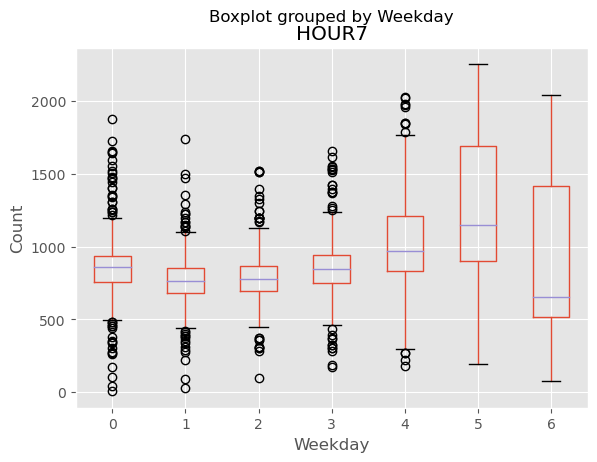

In [114]:
# possibly want to use median instead of mean because of so many outlyers
# don't really get outlyers (especially high outlyers) at peak traffic 
Box2 = Eisenhower_West[['Weekday', 'HOUR7']]
Box2.boxplot(by = 'Weekday', column = 'HOUR7')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

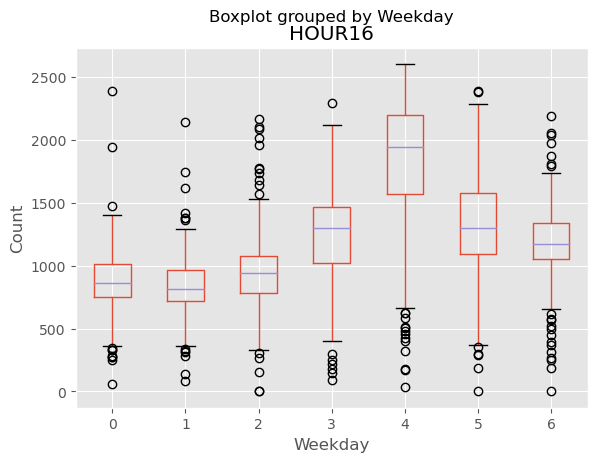

In [115]:
Box2 = Eisenhower_West[['Weekday', 'HOUR16']]
Box2.boxplot(by = 'Weekday', column = 'HOUR16')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

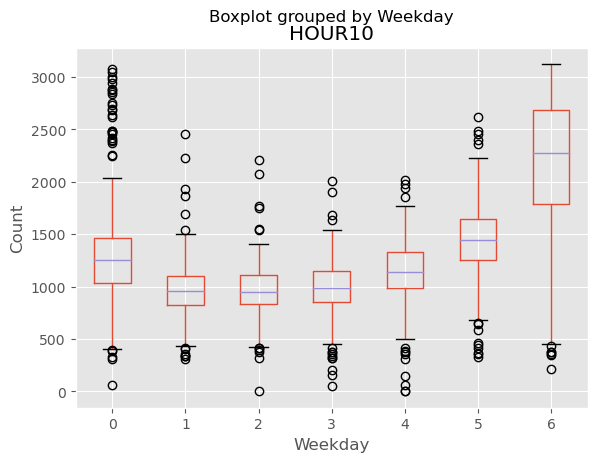

In [116]:
Box = Eisenhower_East[['Weekday', 'HOUR10']]
Box.boxplot(by = 'Weekday', column = 'HOUR10')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

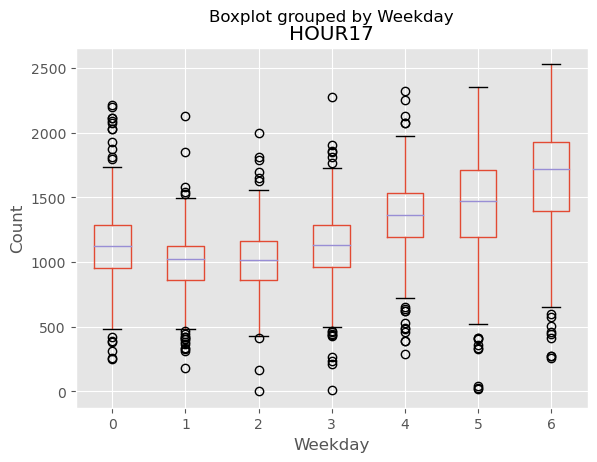

In [117]:
Box = Eisenhower_East[['Weekday', 'HOUR17']]
Box.boxplot(by = 'Weekday', column = 'HOUR17')
plt.ylabel('Count')

In [348]:
Group_Time.iloc[:, 2:4]

Count_E   Weekday
Year Month                      
2018 1      787.070968  2.806452
     2      782.028571  3.000000
     3      816.907692  3.230769
     4      634.226667  3.000000
     5      614.838710  2.903226
...                ...       ...
2023 5      624.774194  2.806452
     6      792.820000  3.033333
     7      969.103448  3.241379
     8      800.258065  2.903226
     9      827.393333  3.100000

[69 rows x 2 columns]

In [367]:
Group_Time.iloc[:, 1:3]

Count_W     Count_E
Year Month                        
2018 1      788.032258  787.070968
     2      817.621429  782.028571
     3      895.130769  816.907692
     4      617.826667  634.226667
     5      633.187097  614.838710
...                ...         ...
2023 5      644.967742  624.774194
     6      817.480000  792.820000
     7      922.855172  969.103448
     8      852.774194  800.258065
     9      858.953333  827.393333

[69 rows x 2 columns]

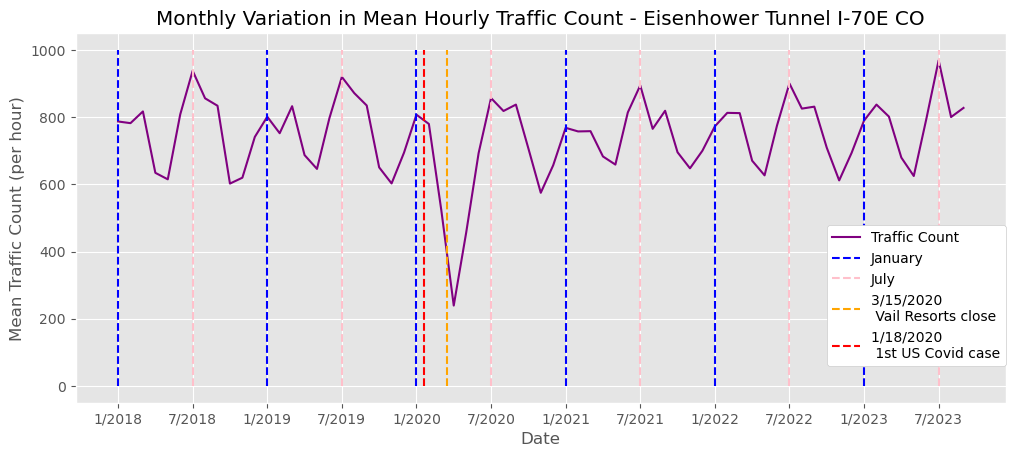

In [339]:
plt.figure().set_figwidth(12)
a = range(0,69)
plt.plot(a,'Count_E', data = Group_Time, color = 'purple', label = 'Traffic Count')
plt.xlabel('Date')
plt.ylabel('Mean Traffic Count (per hour)')
plt.xticks(range(0,70,6))
plt.title('Monthly Variation in Mean Hourly Traffic Count - Eisenhower Tunnel I-70E CO')
plt.grid(True, linestyle='-')
plt.vlines([0, 12, 24, 36, 48, 60], 0, 1000, linestyles='--', colors='blue', label = 'January')
plt.vlines([6, 18, 30, 42, 54, 66], 0, 1000, linestyles='--', colors='pink', label = 'July')
plt.vlines(26.48, 0, 1000, linestyles='--', colors='orange', label = '3/15/2020 \n Vail Resorts close')
plt.vlines(24.58, 0, 1000, linestyles='--', colors='red', label = '1/18/2020 \n 1st US Covid case')
plt.legend(frameon = True, framealpha = 1, facecolor = 'w', bbox_to_anchor = (.8, .5), loc = 'upper left')
plt.xticks(ticks=[0, 6, 12, 18, 24, 30, 36, 42, 48, 54, 60, 66], 
           labels=['1/2018', '7/2018', '1/2019', '7/2019','1/2020', '7/2020','1/2021', '7/2021',
                   '1/2022', '7/2022','1/2023', '7/2023'])
plt.show()

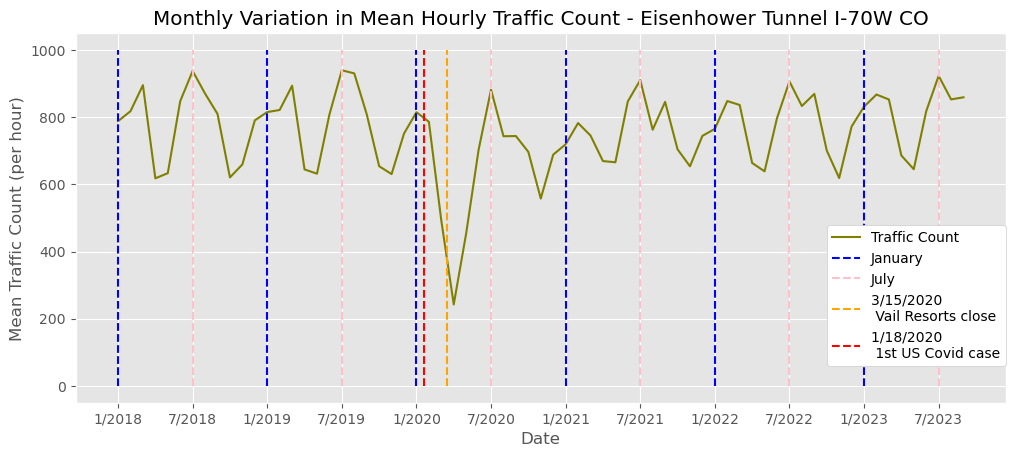

In [338]:
plt.figure().set_figwidth(12)
a = range(0,69)
plt.plot(a,'Count_W', data = Group_Time, color = 'olive', label = 'Traffic Count')
plt.xlabel('Date')
plt.ylabel('Mean Traffic Count (per hour)')
plt.xticks(range(0,70,6))
plt.title('Monthly Variation in Mean Hourly Traffic Count - Eisenhower Tunnel I-70W CO')
plt.grid(True, linestyle='-')
plt.vlines([0, 12, 24, 36, 48, 60], 0, 1000, linestyles='--', colors='blue', label = 'January')
plt.vlines([6, 18, 30, 42, 54, 66], 0, 1000, linestyles='--', colors='pink', label = 'July')
plt.vlines(26.48, 0, 1000, linestyles='--', colors='orange', label = '3/15/2020 \n Vail Resorts close')
plt.vlines(24.58, 0, 1000, linestyles='--', colors='red', label = '1/18/2020 \n 1st US Covid case')
plt.legend(frameon = True, framealpha = 1, facecolor = 'w', bbox_to_anchor = (.8, .5), loc = 'upper left')
plt.xticks(ticks=[0, 6, 12, 18, 24, 30, 36, 42, 48, 54, 60, 66], 
           labels=['1/2018', '7/2018', '1/2019', '7/2019','1/2020', '7/2020','1/2021', '7/2021',
                   '1/2022', '7/2022','1/2023', '7/2023'])
plt.show()

In [335]:
fig3 = go.Figure()


fig3.add_trace(go.Scatter(x=Timeseries.index, y=Timeseries.Count_E,
                    mode='lines',
                    name='East',
                    line_color = 'purple'))
fig3.add_trace(go.Scatter(x=Timeseries.index, y=Timeseries.Count_W,
                    mode='lines',
                    name='West',
                    line_color = 'olive'))

fig3.update_layout(width = 1400, height = 600, title = 'Traffic Volume Counts at the Eisenhower Tunnel I-70 CO')
fig3.update_yaxes(title = 'Traffic Count (per hour)')
fig3.update_xaxes(title = 'Date')
fig3.show()

C:\Users\Natalie\AppData\Local\Temp\ipykernel_7432\2758260441.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Text(0.5, 0, 'Time')

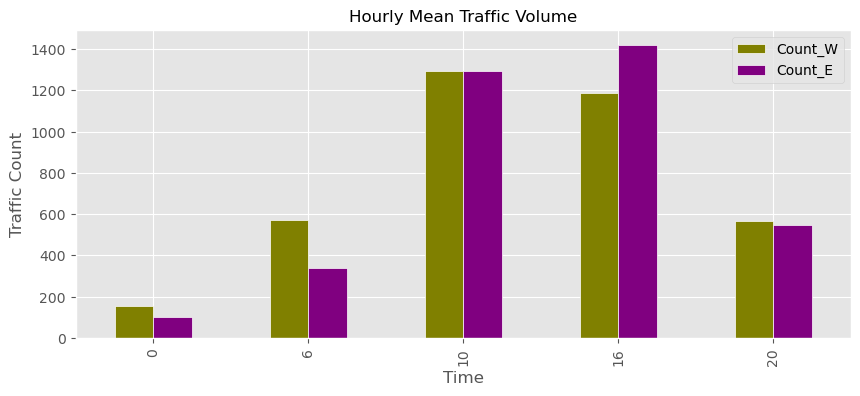

In [419]:
Timeseries.groupby('Time')['Count_W', 'Count_E'].mean().plot.bar(
    color = ['olive', 'purple'],
    figsize = (10, 4),
    width = .5,
    edgecolor = 'white')
plt.title('Hourly Mean Traffic Volume', fontsize = 12)
#plt.legend()
plt.ylabel('Traffic Count')
plt.xlabel('Time')

In [415]:
figday = px.bar(Timeseries.groupby('Weekday')['Count_W', 'Count_E'].mean(), 
       barmode = 'group',  
       title = 'Mean Houly Traffic Volume by Day of the Week (mean from 12am, 6am, 10am, 4pm, and 8pm)',
       color_discrete_sequence = ['olive', 'purple'],
       category_orders = {'Weekday' : ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 
                                      'Friday', 'Saturday', 'Sunday']})

figday.update_yaxes(title = 'Traffic Count')


C:\Users\Natalie\AppData\Local\Temp\ipykernel_7432\10995680.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [280]:
Timeseries.groupby('Month')['Count_W', 'Count_E'].mean()

C:\Users\Natalie\AppData\Local\Temp\ipykernel_7432\52103043.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [412]:
figmonth = px.bar(Timeseries.groupby('Month')['Count_W', 'Count_E'].mean(), 
       barmode = 'group',  
       title = 'Mean Houly Traffic Volume by Month (mean from 12am, 6am, 10am, 4pm, and 8pm)',
       color_discrete_sequence = ['olive', 'purple'],
       category_orders = {'Month' : ['January', 'February', 'March', 'April', 'May', 'June', 
                                   'July', 'August', 'September', 'October', 'November', 'December']})

figmonth.add_trace(go.Scatter(
    x=['April', 'July', 'October'],
    y=[700, 950, 750],
    mode="text",
    name="Markers and Text",
    text=["Shoulder Season", "Summer", "Shoulder Season"],
    textposition="bottom right"
))

figmonth.add_trace(go.Scatter(
    x=['February', 'December'],
    y=[900, 800],
    mode="text",
    name="Markers and Text",
    text=["Ski Season", 'Ski Season'],
    textposition="bottom center"
))

figmonth.update_yaxes(title = 'Traffic Count')



C:\Users\Natalie\AppData\Local\Temp\ipykernel_7432\3131089077.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

